#**QR Code Encoder/Decoder Project**


QR Code Generator/Decoder
1. Generate a new QR code
2. Decode an existing QR code (from sample)
3. Upload and decode your own QR code
4. Exit

Enter your choice (1-4): 2

Decoding sample QR code...

QR Code generated and saved as sample_qr.png


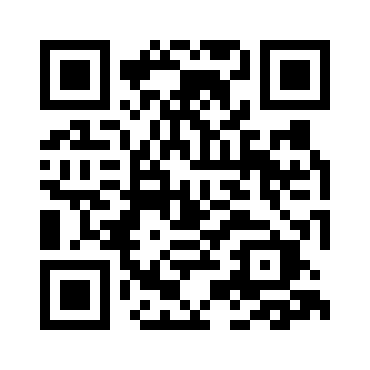


Decoded QR Code Information:
Data: Sample QR Code Content

Enter your choice (1-4): 3

Please upload a QR code image file:


Saving hafsakamali cv_page-0001.jpg to hafsakamali cv_page-0001.jpg

No QR code found in the image.

Enter your choice (1-4): 2

Decoding sample QR code...

QR Code generated and saved as sample_qr.png


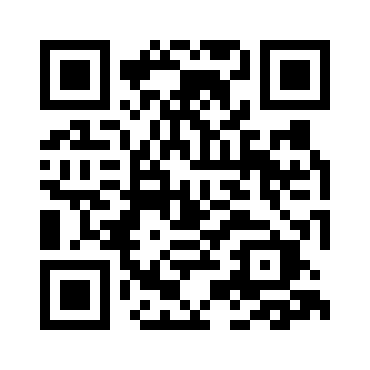


Decoded QR Code Information:
Data: Sample QR Code Content

Enter your choice (1-4): 2

Decoding sample QR code...

QR Code generated and saved as sample_qr.png


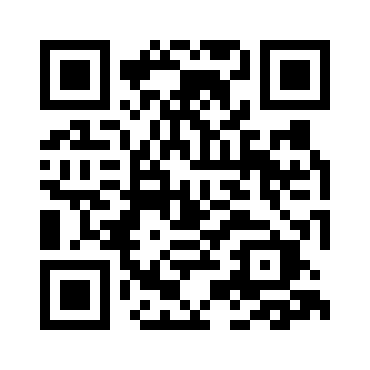


Decoded QR Code Information:
Data: Sample QR Code Content

Enter your choice (1-4): 4
Exiting program...


In [5]:
# Install required packages
!pip install qrcode[pil] opencv-python-headless

import qrcode
import cv2
from PIL import Image
from IPython.display import display, Image as IPImage
from google.colab import files

def generate_qr(data, filename="qr_code.png", fill_color="black", back_color="white", size=10, border=4):
    """Generate a QR code with custom settings"""
    qr = qrcode.QRCode(
        version=1,
        error_correction=qrcode.constants.ERROR_CORRECT_H,
        box_size=size,
        border=border,
    )
    qr.add_data(data)
    qr.make(fit=True)
    img = qr.make_image(fill_color=fill_color, back_color=back_color)
    img.save(filename)
    print(f"\nQR Code generated and saved as {filename}")
    display(IPImage(filename=filename))
    return filename

def decode_qr(image_path):
    """Decode a QR code from an image file"""
    try:
        img = cv2.imread(image_path)
        detector = cv2.QRCodeDetector()
        data, vertices, _ = detector.detectAndDecode(img)

        if vertices is not None:
            print("\nDecoded QR Code Information:")
            print(f"Data: {data}")
        else:
            print("\nNo QR code found in the image.")
    except Exception as e:
        print(f"\nError: {e}")

def main_menu():
    """Display main menu and handle user choice"""
    print("\nQR Code Generator/Decoder")
    print("1. Generate a new QR code")
    print("2. Decode an existing QR code (from sample)")
    print("3. Upload and decode your own QR code")
    print("4. Exit")

    while True:
        choice = input("\nEnter your choice (1-4): ")

        if choice == "1":
            data = input("Enter text/URL to encode: ")
            color = input("Enter QR color (default: black): ") or "black"
            bg_color = input("Enter background color (default: white): ") or "white"
            generate_qr(data, fill_color=color, back_color=bg_color)

        elif choice == "2":
            print("\nDecoding sample QR code...")
            sample_file = generate_qr("Sample QR Code Content", "sample_qr.png")
            decode_qr(sample_file)

        elif choice == "3":
            print("\nPlease upload a QR code image file:")
            uploaded = files.upload()
            if uploaded:
                uploaded_filename = next(iter(uploaded))
                decode_qr(uploaded_filename)
            else:
                print("No file uploaded.")

        elif choice == "4":
            print("Exiting program...")
            break

        else:
            print("Invalid choice. Please enter 1-4.")

# Start the program
if __name__ == "__main__":
    main_menu()